In [1]:
#%matplotlib widget
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygrib
import xarray
from metpy.units import units
from statisticplot import make_map

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from awips.dataaccess import DataAccessLayer
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

ModuleNotFoundError: No module named 'awips'

In [ ]:
# Unidata's cloud EDEX instance is used in this example
edex_url = "edex-cloud.unidata.ucar.edu"
DataAccessLayer.changeEDEXHost(edex_url)

In [ ]:
dataTypes = DataAccessLayer.getSupportedDatatypes()
dataTypes.sort()
list(dataTypes)

In [3]:
# Create a request for data type grid
grid_request = DataAccessLayer.newDataRequest()
grid_request.setDatatype("grid")

NameError: name 'DataAccessLayer' is not defined

In [6]:
# Grid Locations
grid_locations = DataAccessLayer.getAvailableLocationNames(grid_request)
grid_locations.sort()
list(grid_locations)

['AUTOSPE',
 'ESTOFS',
 'ETSS',
 'FFG-ALR',
 'FFG-FWR',
 'FFG-KRF',
 'FFG-MSR',
 'FFG-ORN',
 'FFG-PTR',
 'FFG-RHA',
 'FFG-RSA',
 'FFG-STR',
 'FFG-TAR',
 'FFG-TIR',
 'FFG-TUA',
 'GFS1p0',
 'GFS20',
 'GribModel:54:0:36',
 'GribModel:54:0:45',
 'HFR-EAST_6KM',
 'HFR-EAST_PR_6KM',
 'HFR-US_EAST_DELAWARE_1KM',
 'HFR-US_EAST_FLORIDA_2KM',
 'HFR-US_EAST_NORTH_2KM',
 'HFR-US_EAST_SOUTH_2KM',
 'HFR-US_EAST_VIRGINIA_1KM',
 'HFR-US_HAWAII_1KM',
 'HFR-US_HAWAII_2KM',
 'HFR-US_HAWAII_6KM',
 'HFR-US_WEST_500M',
 'HFR-US_WEST_CENCAL_2KM',
 'HFR-US_WEST_LOSANGELES_1KM',
 'HFR-US_WEST_LOSOSOS_1KM',
 'HFR-US_WEST_NORTH_2KM',
 'HFR-US_WEST_SANFRAN_1KM',
 'HFR-US_WEST_SOCAL_2KM',
 'HFR-US_WEST_WASHINGTON_1KM',
 'HFR-WEST_6KM',
 'HPCGuide',
 'HPCqpfNDFD',
 'HRRR',
 'HRRR-Smoke',
 'LAMP2p5',
 'MRMS_0500',
 'MRMS_1000',
 'MRMS_AK_1000',
 'MRMS_CA_0500',
 'MRMS_CA_1000',
 'MRMS_GU_0500',
 'MRMS_HI_0500',
 'NAM12',
 'NAM40',
 'NOHRSC-SNOW',
 'NationalBlend',
 'RAP13',
 'RTMA',
 'RTOFS-Now-WestAtl',
 'RTOFS-Now

In [7]:
# Pick a model and set the location for the grid request -- we'll be using the Global Forecast System (GFS)
grid_request.setLocationNames("HRRR")
grid_params = DataAccessLayer.getAvailableParameters(grid_request)
grid_params.sort()
list(grid_params)

['36SHRMi',
 '50dbzZ',
 'AV',
 'Along',
 'AppT',
 'BLI',
 'BRN',
 'BRNEHIi',
 'BRNSHR',
 'BRNmag',
 'BRNvec',
 'BdEPT06',
 'BlkMag',
 'BlkShr',
 'CAPE',
 'CCP',
 'CFRZR',
 'CICEP',
 'CIn',
 'CPOFP',
 'CPr',
 'CPrD',
 'CRAIN',
 'CSNOW',
 'CURU',
 'CXR',
 'CapeStk',
 'Corf',
 'CorfF',
 'CorfFM',
 'CorfM',
 'CritT1',
 'CumNrm',
 'CumShr',
 'DivF',
 'DivFn',
 'DivFs',
 'DpD',
 'DpT',
 'EHI',
 'EHI01',
 'EHIi',
 'EPT',
 'EPTA',
 'EPTC',
 'EPTGrd',
 'EPTGrdM',
 'EPTs',
 'EPVg',
 'EPVs',
 'EPVt1',
 'EPVt2',
 'ESP',
 'ESP2',
 'FVecs',
 'FeatMot',
 'FnVecs',
 'FsVecs',
 'Fzra1',
 'Fzra2',
 'GH',
 'GHxSM',
 'GHxSM2',
 'GVV',
 'GVV1hr',
 'Gust',
 'HCDC',
 'HI4',
 'HIdx',
 'HPBL',
 'Heli',
 'HeliC',
 'INV',
 'IPLayer',
 'Into',
 'KI',
 'L-I',
 'LCDC',
 'LIsfc2x',
 'LM5',
 'LM6',
 'LTNG',
 'MAXDVV',
 'MAXDVV1hr',
 'MAXREF',
 'MAXREF1hr',
 'MAXUPHL',
 'MAXUVV',
 'MAXUVV1hr',
 'MAdv',
 'MCDC',
 'MCon',
 'MCon2',
 'MLLCL',
 'MMP',
 'MSFDi',
 'MSFi',
 'MSFmi',
 'MSG',
 'MTV',
 'MXDVV',
 'MXREF',
 'MXUP

In [8]:
parameters = ["LTNG", "REFC"]
grid_request.setParameters(*parameters)
grid_levels = DataAccessLayer.getAvailableLevels(grid_request)
for lvl in grid_levels:
    print(lvl)

0.0EA


In [9]:
grid_request.getParameters()

['LTNG', 'REFC']

In [10]:
grid_cycles = DataAccessLayer.getAvailableTimes(grid_request, True)
grid_cycles

[<DataTime instance: 2023-11-28 13:00:00 >,
 <DataTime instance: 2023-11-28 14:00:00 >]

In [11]:
# Available grid times
grid_times = DataAccessLayer.getAvailableTimes(grid_request)
## Using -1 in an array will access the last element of the array
##  (using -2 will access the second last element, and so on)
grid_fcstRun = DataAccessLayer.getForecastRun(grid_cycles[-2], grid_times)

## print out the time instances
times = []
for fcst in grid_fcstRun:
    print(fcst.getRefTime(), ":", fcst.getFcstTime() / 3600, "hours")

2023-11-28 13:00:00.000 : 0.0 hours
2023-11-28 13:00:00.000 : 1.0 hours
2023-11-28 13:00:00.000 : 2.0 hours
2023-11-28 13:00:00.000 : 3.0 hours
2023-11-28 13:00:00.000 : 4.0 hours
2023-11-28 13:00:00.000 : 5.0 hours
2023-11-28 13:00:00.000 : 6.0 hours
2023-11-28 13:00:00.000 : 7.0 hours
2023-11-28 13:00:00.000 : 8.0 hours
2023-11-28 13:00:00.000 : 9.0 hours
2023-11-28 13:00:00.000 : 10.0 hours
2023-11-28 13:00:00.000 : 11.0 hours
2023-11-28 13:00:00.000 : 12.0 hours
2023-11-28 13:00:00.000 : 13.0 hours
2023-11-28 13:00:00.000 : 14.0 hours
2023-11-28 13:00:00.000 : 15.0 hours
2023-11-28 13:00:00.000 : 16.0 hours
2023-11-28 13:00:00.000 : 17.0 hours
2023-11-28 13:00:00.000 : 18.0 hours


In [12]:
## Grid Data
get_fhr = 8
grid_response = DataAccessLayer.getGridData(grid_request, [grid_fcstRun[get_fhr]])
# convert to dictionary because order of grids in grid_response list is not known
grid_response = {grid.getParameter():grid for grid in grid_response}

In [13]:
for parm, grid in grid_response.items():
    lons, lats = grid.getLatLonCoords()
    print(
        "Time :",
        grid.getDataTime(),
        "+",
        grid.getDataTime().getFcstTime() / 3600,
        "hours",
    )
    ## Take a look at some information in our data
    print("Parm :", str(parm))
    print("Unit :", str(grid.getUnit()))

valid_time = pd.to_datetime(str(grid.getDataTime())) + pd.Timedelta(
    seconds=grid.getDataTime().getFcstTime()
)
print("Model:", str(grid.getLocationName()))

Time : 2023-11-28 13:00:00 + 8.0 hours
Parm : REFC
Unit : dB
Time : 2023-11-28 13:00:00 + 8.0 hours
Parm : LTNG
Unit : count
Model: HRRR


In [14]:
ltng = np.ma.masked_equal(grid_response["LTNG"].getRawData(), -999999)
refc = np.ma.masked_equal(grid_response["REFC"].getRawData(), -999999)

In [15]:
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
ltng.mask = ltng <= 0.01

In [16]:
refc.min()

-10.000002

Text(0.5, 1.0, 'HRRR init 2023-11-28 13:00:00.000 valid 2023-11-28 21:00:00')

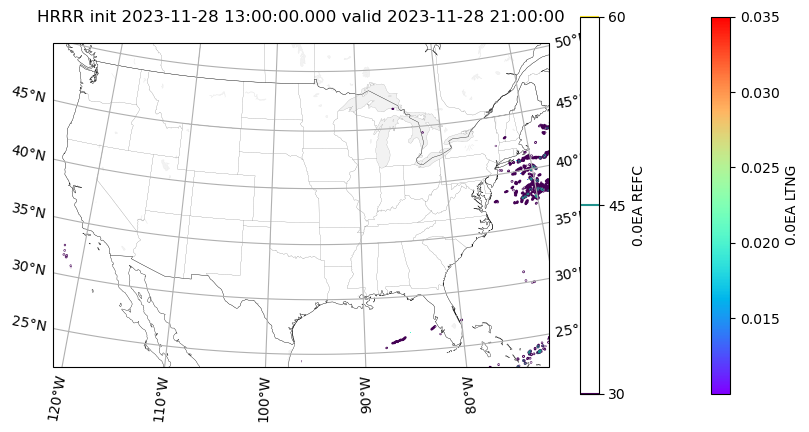

In [17]:
cmap = plt.get_cmap("rainbow")
bbox = [-103, -97, 40, 43]
fig, ax = make_map()
cs = ax.pcolormesh(lons, lats, ltng, transform=ccrs.PlateCarree(), cmap=cmap)

cbar = fig.colorbar(cs, shrink=0.7, orientation="vertical")
cbar.set_label(
    grid_response["LTNG"].getLevel()
    + " "
    + grid_response["LTNG"].getParameter()
)
rc = ax.contour(lons, lats, refc, levels=[30, 45, 60], transform=ccrs.PlateCarree())
cb2 = fig.colorbar(rc, shrink=0.7, orientation="vertical")
cb2.set_label(
    grid_response["REFC"].getLevel()
    + " "
    + grid_response["REFC"].getParameter()
)
ax.set_title(
    grid_response["REFC"].getLocationName()
    + " init "
    + str(grid.getDataTime().getRefTime())
    + " valid "
    + valid_time.strftime("%Y-%m-%d %H:%M:%S")
)

In [18]:
fhr = grid.getDataTime()
fhr = pd.Timedelta(seconds=fhr.getFcstTime()) / pd.Timedelta(hours=1)
fhr = int(fhr)

In [19]:
itime = grid.getDataTime()
itime = pd.to_datetime(str(itime))
# We only pull 0,6,12,18z initialization times
itime = itime.floor(pd.Timedelta(hours=6))

In [24]:
itime = pd.to_datetime("20230831")
hh = itime.hour
assert itime <= pd.to_datetime("20231102T18"), "no recent HRRR on sobash scratch anymore"
idir = Path("/glade/scratch/sobash/HRRR") / itime.strftime("%Y%m%d%H")
ds = xarray.open_dataset(
    idir / f"hrrr.t{hh:02d}z.wrfsfcf{fhr:02d}.grib2",
    filter_by_keys={"typeOfLevel": "atmosphere", "stepType": "instant"},
    backend_kwargs={"indexpath": os.getenv("TMPDIR") + "/{short_hash}.idx"},
)

Ignoring index file '/glade/derecho/scratch/ahijevyc/tmp/923a8.idx' incompatible with GRIB file


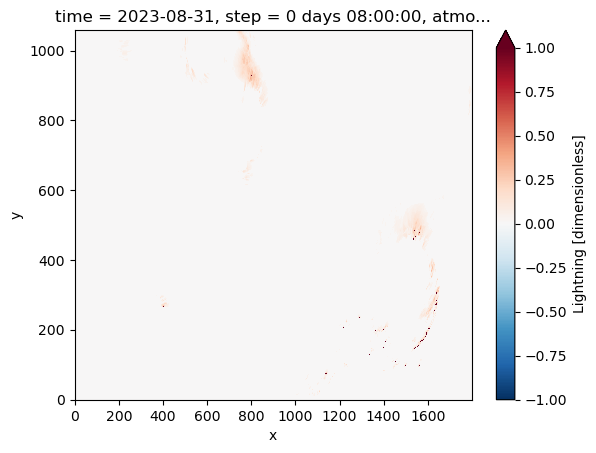

In [25]:
ds.ltng.plot(vmin=-1)